<h1 align="center">Zewail University of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2018)</h2>
<h2 align="center">Lab 11: Ensemble Methods</h3>
<h3 align="center">29/11/2018</h3>

In [1]:
from lab11_functions import plot_classifier, plot_4_classifiers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## Ensemble Methods can be divided into:

### 1) Averaging Methods

### 2) Boosting Methods

## <font color="#00cccc">Averaging Methods<font/>

### <font color = "#af00af"> Which is better, calling a friend or asking the Audiance? <font/>
<img src="millionaire.jpg">
#### The audiance are many weak classifiers, while the friend is one strong classifier (you would generally choose someone very knowledgable)

### Why does Averaging work?
<img src="Averaging1.PNG">
source: https://ubc-cs.github.io/cpsc340/lectures/L7.pdf

### <font color = "#af00af"> Would Averaging work better with Perceptron or Logistic Regression? <font/>

In [2]:
n = 30
np.random.seed(10)
X = np.random.randn(n,2)
y = np.random.choice((-1,+1),size=n)
X[y>0,0] -= 2
X[y>0,1] += 2

E:\Programs\Installed_Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


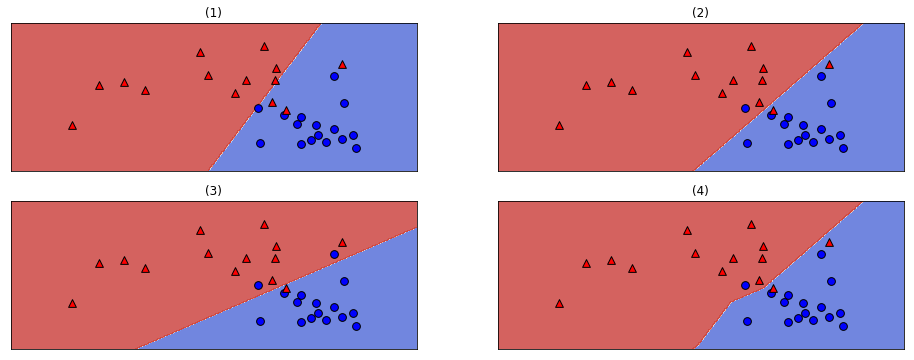

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.ensemble import VotingClassifier

perceptron1 = Perceptron(random_state = 1, max_iter=1000)
perceptron1.fit(X,y)
perceptron2 = Perceptron(random_state = 2, max_iter=1000)
perceptron2.fit(X,y)
perceptron3 = Perceptron(random_state = 3, max_iter=1000)
perceptron3.fit(X,y)

perceptron_ensemble = VotingClassifier(
    estimators=[('perceptron1', perceptron1), ('perceptron2', perceptron2), ('perceptron3', perceptron3)])
perceptron_ensemble.fit(X,y)

perceptrons = [perceptron1,perceptron2,perceptron3,perceptron_ensemble]

plot_4_classifiers(X,y,perceptrons)

E:\Programs\Installed_Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


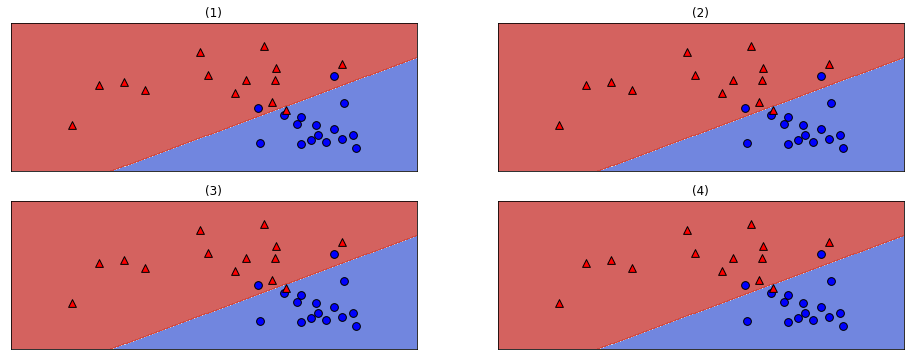

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

logistic1 = LogisticRegression(random_state=1)
logistic1.fit(X,y)
logistic2 = LogisticRegression(random_state=2)
logistic2.fit(X,y)
logistic3 = LogisticRegression(random_state=3)
logistic3.fit(X,y)

logistic_ensemble = VotingClassifier(
    estimators=[('logistic1', logistic1), ('logistic2', logistic2), ('logistic3', logistic3)])
logistic_ensemble.fit(X,y)

logistics = [logistic1,logistic2,logistic3,logistic_ensemble]

plot_4_classifiers(X,y,logistics)

### <font color = "#af00af"> What are the conditions necessary for the averaging to increase performance? <font/>

### Stacking:
#### Averaging can be:
#### 1) Unweighted average (majority vote for classification)
#### 2) Weighted average
### $$ y_i = f_i(x_1,x_2,...) $$
### $$ y_e = \sum_{i} \alpha_i y_i\ \ \ \ (regression)$$
### $$ y_e = sign(\sum_{i} \alpha_i y_i)\ \ \ \ (classification)$$
#### 3) Stacking (predictor of predictors)
### $$ y_i = f_i(x_1,x_2,...) $$
### $$ y_e = f_e(y_1,y_2,..)$$


### <font color = "#af00af"> If $f_e$ is linear, what does that mean? <font/>

### <font color = "#af00af"> Can we use averaging with Linear Regression? <font/>

### <font color = "#af00af"> how can we train the weighted average weights or the stacking predictor parameters? <font/>

## Bagging (Bootstrap Aggregation)
### It helps add randomness to decrease correlation and increase independence between ensemble classifiers
## Bootstrapping:
### Given a dataset of size N, sample a new dataset of size N' "with replacement"
## Bagging:
### 1) Create several Bootstrap samples
### 2) Fit a classifier to each sample
### 3) Average the classifiers predictions in test time

### <font color = "#af00af"> What are the benefits of bagging? <font/>

## Random Forests
### Random Forests are bagging applied on decision "trees" (hence the name forests)
### Random Forests increase randomness even more by choosing the optimal feature for each node from a subset of "randomly chosen" features
<img src="RF.jpg">
source: https://www.youtube.com/watch?v=-bYrLRMT3vY
### <font color = "#cc2f2f"> Random Forests are one of the strongest models available, they decrease overfitting through averaging many high variance decision trees, and decrease computational power needed by choosing only a subset of the features each time (hence they are suitable for problems with very large amount of features) <font/>

### <font color = "#af00af"> Why are decision trees the perfect candidate for bagging? <font/>

### <font color = "#af00af"> How can Random Forests be considered feature selectors? <font/>

## Some Random Forests Hyperparameters:
### 1) Size of bootstrap samples
### 2) Number of random features chosen each time (the lower this number, the more uncorrelated the trees become)
### 3) Forest size (number of trees)
<img src="RFSize.png">
source: https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/decisionForests_MSR_TR_2011_114.pdf
### 4) Maximum allowed tree depth
<img src="RFDepth.png">
source: https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/decisionForests_MSR_TR_2011_114.pdf

## Effect of Bagging:
### <font color = "#cc2f2f"> Random Forests without bagging act as a Max-Margin classifier
<img src="Bagging.png">
source: https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/decisionForests_MSR_TR_2011_114.pdf
### Decision Tree trained on full dataset
<img src="Full_DT.PNG">
source: http://sli.ics.uci.edu/Classes/2016W-178?action=download&upname=10_ensembles.pdf
### Decision Trees trained on bootstrap samples (bagging) and averaged
<img src="Avg_DTs.PNG">
source: http://sli.ics.uci.edu/Classes/2016W-178?action=download&upname=10_ensembles.pdf

### <font color = "#af00af"> Can Random Forest weak classifiers be trained in parallel? <font/>

## <font color = "#afaf00"> Boosting (Adaboost) <font/>
### Train classifiers sequentially with each classifier focusing on what the previous classifiers got wrong
### The resulting classifier is a combination of all the weak classifiers (as in weighted averaging)
### $$ y_e = sign(\sum_{t} \alpha_t y_t)$$
### $$ \alpha_t = \frac{1}{2} \ln(\frac{1-\epsilon_t}{\epsilon_t})$$
### $$ \epsilon_t =\ error\ rate\ for\ the\ t^{th}\ classifier\ = \frac{number\ of\ misclassifications\ for\ the\ t^{th}\ classifier}{training\ set\ size}$$
<img src="adaboost_alphacurve.png">
source: http://mccormickml.com/2013/12/13/adaboost-tutorial/
### <font color = "#cc2f2f"> Stronger classifier has a lower error rate, hence a higher weight (with weight of zero for 50% classifiers)
### $$ D_{t+1}(i) = \frac{D_t(i)e^{-\alpha_tt_iy_t(i)}}{Z_t}$$
### Where $D_t(i)$ is the weight of the $i^{th}$ point for the $t^{th}$ classifier, $Z_t$ is a normalization constant
<img src="exp_x.png">
source: http://mccormickml.com/2013/12/13/adaboost-tutorial/
### <font color = "#cc2f2f"> Points which are misclassified ($t_i$ is positive and $y_t(i)$ is negative or vice versa) have a positive exponential term, and hence their weights increase

## <font color = "#ff0000"> Exercise: <font/>

training set size: 112 samples 
test set size: 38 samples


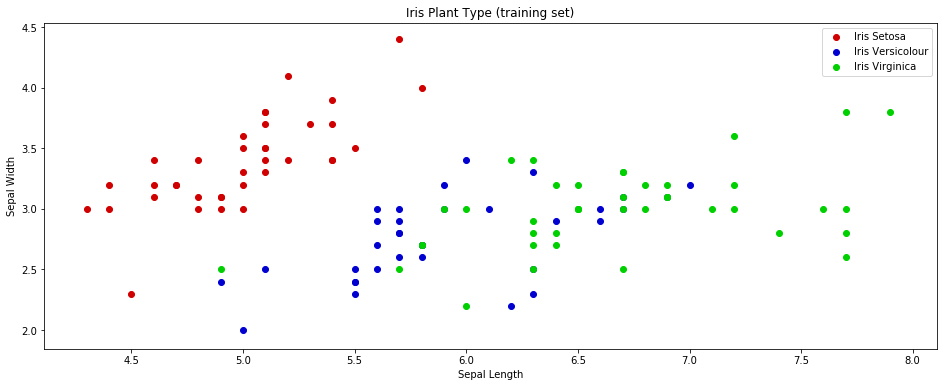

In [60]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from lab11_functions import plot_iris_data

# import iris dataset
iris = datasets.load_iris()

# We would use only the first two features
X = iris.data[:,:2]
y = iris.target

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 0)

del X, y
print (f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples")
plot_iris_data(X_train,y_train)

### <font color = "#ff0000"> Train a Decision Tree model using Information Gain criterion, print training and testing accuracies <font/>

Training accuracy = 93.8%, Testing accuracy = 65.8%


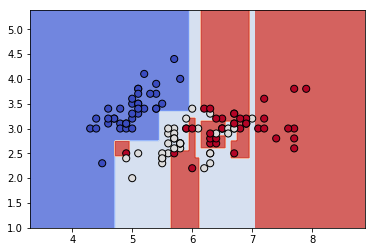

In [76]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion="entropy")
DT.fit(X_train,y_train)
training_accuracy = DT.score(X_train,y_train)
testing_accuracy = DT.score(X_test,y_test)
print(f"Training accuracy = {training_accuracy*100:.1f}%, Testing accuracy = {testing_accuracy*100:.1f}%")
plot_classifier(X=X_train,y=y_train,clf=DT)

### <font color = "#ff0000"> Train a Random Forest model using Information Gain criterion, maximum depth of 3, 10 classifiers, and random_state=3, print training and testing accuracies <font/>

Training accuracy = 81.2%, Testing accuracy = 76.3%


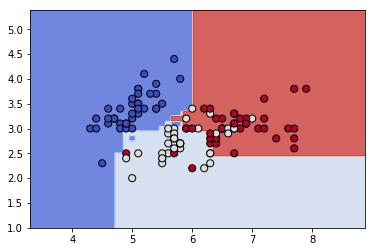

In [77]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion="entropy", random_state=3, max_depth=3, n_estimators=10)
RF.fit(X_train,y_train)
training_accuracy = RF.score(X_train,y_train)
testing_accuracy = RF.score(X_test,y_test)
print(f"Training accuracy = {training_accuracy*100:.1f}%, Testing accuracy = {testing_accuracy*100:.1f}%")
plot_classifier(X=X_train,y=y_train,clf=RF)

### <font color = "#ff0000"> Train an adaboost ensemble model using decision trees classifier with Information Gain criterion, maximum depth of 3, 10 classifiers, and random_state=3, print training and testing accuracies <font/>

Training accuracy = 90.2%, Testing accuracy = 71.1%


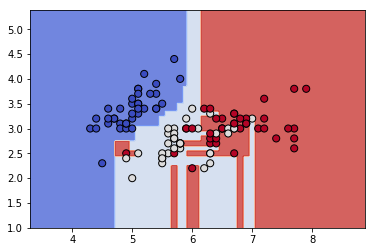

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

DT_base = DecisionTreeClassifier(criterion="entropy", max_depth=3)
AB = AdaBoostClassifier(base_estimator=DT_base, random_state=3, n_estimators=10)
AB.fit(X_train,y_train)
training_accuracy = AB.score(X_train,y_train)
testing_accuracy = AB.score(X_test,y_test)
print(f"Training accuracy = {training_accuracy*100:.1f}%, Testing accuracy = {testing_accuracy*100:.1f}%")
plot_classifier(X=X_train,y=y_train,clf=AB)